In [22]:
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.mixture import GaussianMixture

In [2]:
adata = anndata.read_h5ad("/home/liujingyue/wyc_20231021/single_cell_SEQ/project/chemotherapy/epicell.h5ad")

/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [3]:
adata.var

,vf_vst_counts.p11post.1_mean,vf_vst_counts.p11post.1_variance,vf_vst_counts.p11post.1_variance.expected,vf_vst_counts.p11post.1_variance.standardized,vf_vst_counts.p11post.1_variable,vf_vst_counts.p11post.1_rank,vf_vst_counts.p12post.1_mean,vf_vst_counts.p12post.1_variance,vf_vst_counts.p12post.1_variance.expected,vf_vst_counts.p12post.1_variance.standardized,...,vf_vst_counts.EP-12-B-10xT.3_variable,vf_vst_counts.EP-12-B-10xT.3_rank,vf_vst_counts_mean,vf_vst_counts_variance,vf_vst_counts_variance.expected,vf_vst_counts_variance.standardized,vf_vst_counts_variable,vf_vst_counts_rank,var.features,var.features.rank
AL627309.1,0.001933,0.001930,0.001986,0.972076,0,-2147483648,0.006937,0.009026,0.007848,1.150047,...,0,-2147483648,0.003735,0.003835,0.004275,0.897032,0,-2147483648,NA,-2147483648
AL627309.5,0.000483,0.000483,0.000483,1.000492,0,-2147483648,0.005870,0.005837,0.006543,0.892052,...,2,-2147483648,0.006339,0.006299,0.007495,0.840470,0,-2147483648,NA,-2147483648
AC114498.1,0.000967,0.000966,0.000970,0.995831,0,-2147483648,NaN,NaN,NaN,NaN,...,2,-2147483648,0.000000,0.000000,0.000000,0.000000,0,-2147483648,NA,-2147483648
LINC01409,0.030449,0.030504,0.036780,0.829353,0,-2147483648,0.033084,0.037870,0.042085,0.899834,...,0,-2147483648,0.036278,0.046963,0.047446,0.989814,0,-2147483648,NA,-2147483648
LINC01128,0.021266,0.020824,0.025100,0.829632,0,-2147483648,0.032551,0.036303,0.041378,0.877350,...,0,-2147483648,0.048616,0.057349,0.064085,0.894880,0,-2147483648,NA,-2147483648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL022323.5,NaN,NaN,NaN,NaN,2,-2147483648,NaN,NaN,NaN,NaN,...,2,-2147483648,0.000000,0.000000,0.000000,0.000000,0,-2147483648,NA,-2147483648
AC022164.1,NaN,NaN,NaN,NaN,2,-2147483648,NaN,NaN,NaN,NaN,...,2,-2147483648,0.000000,0.000000,0.000000,0.000000,0,-2147483648,NA,-2147483648
AC093772.2,NaN,NaN,NaN,NaN,2,-2147483648,NaN,NaN,NaN,NaN,...,2,-2147483648,0.000000,0.000000,0.000000,0.000000,0,-2147483648,NA,-2147483648
LINC01820,NaN,NaN,NaN,NaN,2,-2147483648,NaN,NaN,NaN,NaN,...,2,-2147483648,0.000057,0.000057,0.000057,0.999823,0,-2147483648,NA,-2147483648


In [4]:
adata.var_names

Index(['AL627309.1', 'AL627309.5', 'AC114498.1', 'LINC01409', 'LINC01128',
       'LINC00115', 'FAM41C', 'AL645608.6', 'SAMD11', 'NOC2L',
       ...
       'COX8C', 'AC022467.2', 'AC010536.2', 'MBD3L2B', 'AC092070.3',
       'AL022323.5', 'AC022164.1', 'AC093772.2', 'LINC01820', 'AC025254.1'],
      dtype='object', length=32187)

In [5]:
adata.to_df().shape ###cell number*genenumber

(17669, 32187)

In [6]:
adata.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,response,group,re_gr,data_group,percent.mt,seurat_clusters,raw_cluster,celltype,RNA_snn_res.1,RNA_snn_res.2,EMT1,CYCLE1,GIM1,GIM_UCell,EMT_UCell,RNA_snn_res.3
p11post_AACTTTCCAGGGATTG-1,p11post,2454.0,1301,PR,Post,PR_Post,BGI,19.967400,9,Epi,malignant,7,9,0.038760,0.089754,-0.351531,0.0,0.100731,31
p11post_ACCCACTCACCAACCG-1,p11post,2490.0,1622,PR,Post,PR_Post,BGI,3.895582,22,Epi,transition,14,22,0.077367,0.093650,-0.405651,0.0,0.112901,19
p11post_ACGCCAGGTGTGGTTT-1,p11post,1388.0,794,PR,Post,PR_Post,BGI,17.723343,8,Epi,malignant,11,8,0.014908,0.051631,-0.331010,0.0,0.079911,8
p11post_ACTATCTCATGTTGAC-1,p11post,1444.0,798,PR,Post,PR_Post,BGI,15.650970,28,Epi,transition,5,28,0.046329,0.053090,-0.305860,0.0,0.091546,1
p11post_ACTTACTGTTCCACAA-1,p11post,1306.0,790,PR,Post,PR_Post,BGI,13.399694,22,Epi,transition,10,22,-0.035762,0.051859,-0.301809,0.0,0.062865,19


In [8]:
adata.to_df().iloc[0:5,0:5]

,AL627309.1,AL627309.5,AC114498.1,LINC01409,LINC01128
p11post_AACTTTCCAGGGATTG-1,-0.054431,-0.072039,0.0,-0.164858,-0.196363
p11post_ACCCACTCACCAACCG-1,-0.054431,-0.072039,0.0,-0.164858,-0.196363
p11post_ACGCCAGGTGTGGTTT-1,-0.054431,-0.072039,0.0,-0.164858,-0.196363
p11post_ACTATCTCATGTTGAC-1,-0.054431,-0.072039,0.0,-0.164858,-0.196363
p11post_ACTTACTGTTCCACAA-1,-0.054431,-0.072039,0.0,-0.164858,-0.196363


In [9]:
DEG = pd.read_csv('/home/liujingyue/wyc_20231021/Python/GMM_mixture/DEG.csv',sep=',')
print(DEG.head(5))

  Unnamed: 0          p_val  avg_log2FC  pct.1  pct.2      p_val_adj genename
0      FABP2   8.397853e-96    4.840388  0.105  0.009   2.703017e-91    FABP2
1      KLK10  2.687401e-162    4.672609  0.165  0.012  8.649937e-158    KLK10
2       DSG3  2.881190e-117    4.566427  0.116  0.005  9.273686e-113     DSG3
3    PLA2G2A  5.130421e-187    4.461058  0.184  0.012  1.651328e-182  PLA2G2A
4    TM4SF20  1.148075e-183    4.417709  0.178  0.010  3.695310e-179  TM4SF20


In [71]:
top200=DEG['genename'].head(100)
top200=top200.tolist()
tail200=DEG['genename'].tail(100)
tail200=tail200.tolist()
print("前200项:")
print(top200)

print("\n最后200项:")
print(tail200)

前200项:
['FABP2', 'KLK10', 'DSG3', 'PLA2G2A', 'TM4SF20', 'CLDN3', 'SLC35F1', 'TMEM176B', 'MUC2', 'FABP1', 'PI3', 'PRAP1', 'PMP22', 'LINC02208', 'KRT6B', 'MALRD1', 'DPEP1', 'SPINK4', 'CCL15', 'CDH17', 'TMEM176A', 'ALDOB', 'KLK1', 'ANPEP', 'MYO7B', 'CDX1', 'DMBT1', 'LINC02253', 'PPP1R1B', 'TNNC2', 'CDX2', 'MGAM2', 'CLRN3', 'ASS1', 'TGM2', 'IFITM1', 'GUCY2C', 'REG1A', 'SAA1', 'CLIC5', 'AC011287.1', 'AC012494.1', 'CEACAM6', 'TNFRSF6B', 'MOGAT3', 'RARRES1', 'F12', 'PLXDC2', 'MUC12', 'SULT2B1', 'FKBP10', 'SEMA6A', 'COL16A1', 'AC103702.2', 'MMP7', 'S100A10', 'TMEM106C', 'C4orf48', 'SELENOM', 'PDZK1IP1', 'DACH1', 'SERPINA3', 'MMP1', 'HEPH', 'PCK1', 'UBE2C', 'MXRA5', 'EPCAM', 'SEMA5A', 'HOXB7', 'PON2', 'GNGT1', 'TRIM54', 'PFDN4', 'GGH', 'VMO1', 'PSMA7', 'RPS4X', 'RPS7', 'LGALS2', 'FUOM', 'EPHB2', 'PLA2R1', 'CENPW', 'C3', 'CCL20', 'SLPI', 'FAM126A', 'PCBD1', 'C4BPB', 'OLFM4', 'REG4', 'MYL9', 'POMP', 'GCSH', 'RPL7A', 'ALOX5', 'RPS21', 'PTTG1', 'PCLAF']

最后200项:
['SLC9A1', 'KCTD11', 'DAPK2', 'SYTL2

In [72]:
#进行基因集打分
sc.tl.score_genes(adata,gene_list=top200,score_name="malignant")
sc.tl.score_genes(adata,gene_list=tail200,score_name="normal")

In [73]:
score1 = adata.obs['malignant']
score2 = adata.obs['normal']

In [75]:
print(score1,score2)

p11post_AACTTTCCAGGGATTG-1        -0.003586
p11post_ACCCACTCACCAACCG-1        -0.087015
p11post_ACGCCAGGTGTGGTTT-1         0.072715
p11post_ACTATCTCATGTTGAC-1         0.039251
p11post_ACTTACTGTTCCACAA-1        -0.056471
                                     ...   
EP-12-B-10xT_TTATGCTTCTATCCTA-1    0.034735
EP-12-B-10xT_TTCTTAGTCCGCATAA-1    0.257899
EP-12-B-10xT_TTTACTGGTGAAAGAG-1    0.121366
EP-12-B-10xT_TTTGCGCCAGCTTAAC-1    0.029842
EP-12-B-10xT_TTTGTCACATATGCTG-1    0.056052
Name: malignant, Length: 17669, dtype: float64 p11post_AACTTTCCAGGGATTG-1        -0.041178
p11post_ACCCACTCACCAACCG-1        -0.029830
p11post_ACGCCAGGTGTGGTTT-1        -0.064948
p11post_ACTATCTCATGTTGAC-1        -0.038554
p11post_ACTTACTGTTCCACAA-1        -0.139746
                                     ...   
EP-12-B-10xT_TTATGCTTCTATCCTA-1   -0.152780
EP-12-B-10xT_TTCTTAGTCCGCATAA-1   -0.070734
EP-12-B-10xT_TTTACTGGTGAAAGAG-1   -0.113571
EP-12-B-10xT_TTTGCGCCAGCTTAAC-1   -0.123257
EP-12-B-10xT_TTTGTCACATATGCTG

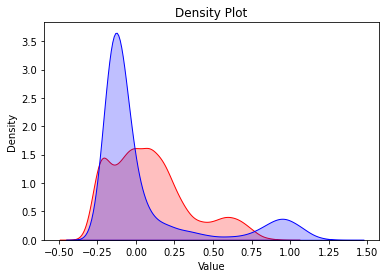

In [76]:
# 使用Seaborn绘制核密度估计图
sns.kdeplot(score1, fill=True,color="red")
sns.kdeplot(score2, fill=True,color="blue")
# 添加标题和标签
plt.title('Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')

# 显示图形
plt.show()

In [100]:
# 将两列数据合成一个矩阵
data_matrix = np.vstack((score1, score2)).T

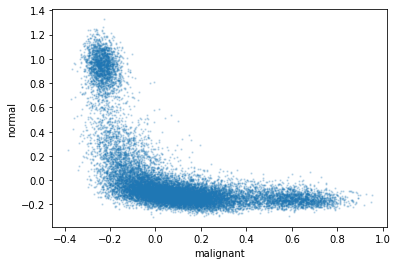

In [93]:
# 绘制散点图
plt.scatter(data_matrix[:, 0], data_matrix[:, 1],s=1.5, alpha=0.2)
plt.xlabel('malignant')
plt.ylabel('normal')
plt.show()

In [101]:
gmm = GaussianMixture(n_components=2,covariance_type='full', random_state=20240403,n_init=30,max_iter=2000,tol= 1e-5)

In [102]:
gmm.fit(data_matrix)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f840a1be5e0>
Traceback (most recent call last):
  File "/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f840a1be5e0>
Traceback 

GaussianMixture(max_iter=2000, n_components=2, n_init=30, random_state=20240403,
                tol=1e-05)

In [103]:
# 提取GMM模型参数
means = gmm.means_
covariances = gmm.covariances_
# 预测每个数据点的类别
labels = gmm.predict(data_matrix)
# 获取每个数据点属于每个分布的概率
probabilities = gmm.predict_proba(data_matrix)

In [104]:
# 将概率值加入data_matrix作为新的两列数据
data_matrix = np.column_stack((data_matrix, probabilities))

In [105]:
data_matrix = pd.DataFrame(data_matrix)
data_matrix.columns= ['malignant','normal','prob_1','prob_2']
data_matrix.index= adata.obs_names
print(data_matrix)

                                 malignant    normal    prob_1        prob_2
p11post_AACTTTCCAGGGATTG-1       -0.003586 -0.041178  0.968797  3.120347e-02
p11post_ACCCACTCACCAACCG-1       -0.087015 -0.029830  0.836846  1.631535e-01
p11post_ACGCCAGGTGTGGTTT-1        0.072715 -0.064948  0.998903  1.097459e-03
p11post_ACTATCTCATGTTGAC-1        0.039251 -0.038554  0.993118  6.881551e-03
p11post_ACTTACTGTTCCACAA-1       -0.056471 -0.139746  0.914707  8.529350e-02
...                                    ...       ...       ...           ...
EP-12-B-10xT_TTATGCTTCTATCCTA-1   0.034735 -0.152780  0.991451  8.549224e-03
EP-12-B-10xT_TTCTTAGTCCGCATAA-1   0.257899 -0.070734  1.000000  7.324963e-10
EP-12-B-10xT_TTTACTGGTGAAAGAG-1   0.121366 -0.113571  0.999936  6.378245e-05
EP-12-B-10xT_TTTGCGCCAGCTTAAC-1   0.029842 -0.123257  0.992385  7.614930e-03
EP-12-B-10xT_TTTGTCACATATGCTG-1   0.056052 -0.072054  0.997620  2.379512e-03

[17669 rows x 4 columns]


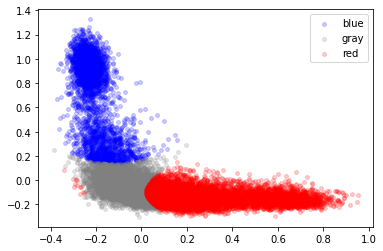

In [112]:
# 根据条件分为不同类别
data_matrix['color'] = 'gray'  # 默认颜色为灰色
data_matrix.loc[data_matrix['prob_1'] > 0.99, 'color'] = 'red'  # 第三列>0.9的用红色表示
data_matrix.loc[data_matrix['prob_2'] > 0.99, 'color'] = 'blue'  # 第四列>0.9的用蓝色表示

# 绘制散点图
fig, ax = plt.subplots()
for category, group in data_matrix.groupby('color'):
    ax.scatter(group['malignant'], group['normal'], c=category, alpha=0.2, s=15, label=category)

# 添加图例
ax.legend()

# 显示图形
plt.show()